In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [6]:
df = pd.read_csv("Watchlist.csv").set_index("date")

In [8]:
df.head()

,AAPL,MU,NVDA,SE,DIS,GM,SQ,SWKS,VTI,VOO,VWO,QQQ
date,,,,,,,,,,,,
2021-04-19,134.84,88.41,614.47,250.00,187.43,57.88,245.33,185.87,215.73,381.74,52.67,338.88
2021-04-16,134.16,90.66,636.50,252.42,187.26,58.71,256.10,189.76,217.15,383.63,52.78,342.01
2021-04-15,134.50,90.27,645.49,250.10,185.93,58.61,263.08,190.65,216.60,382.29,52.61,341.61
2021-04-14,132.03,90.67,611.08,245.56,187.46,58.48,258.40,187.84,214.32,378.23,52.15,336.51
2021-04-13,134.43,92.15,627.18,244.20,185.49,58.49,273.23,189.29,214.80,379.45,51.87,340.60


In [16]:
AAPL = df["AAPL"].iloc[::-1]

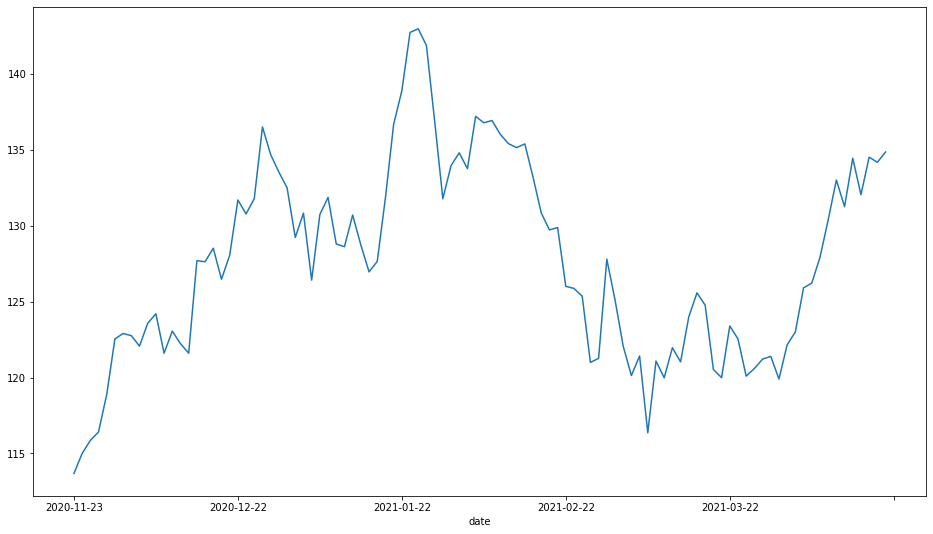

In [18]:
AAPL.plot(figsize = (16,9))

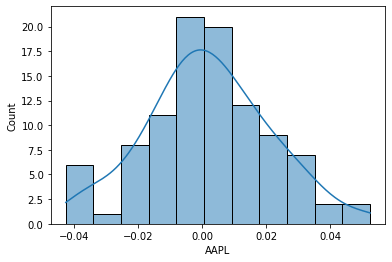

In [26]:
# Logarithmic return
lr = np.log(1+AAPL.pct_change())
sns.histplot(lr, kde = True)

In [30]:
# Drift

mean = lr.mean()
variance = lr.var()
drift = mean - (0.5*variance)

In [46]:
std = lr.std()
days = 20
trials = 1000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + std * Z)

array([[0.9901399 , 0.9810434 , 0.98785744, ..., 1.02060201, 1.002095  ,
        0.9877408 ],
       [1.02743412, 0.96974523, 1.01431759, ..., 0.98183863, 1.0263251 ,
        1.03055891],
       [1.00755761, 0.97512417, 0.99651368, ..., 0.9783351 , 1.00840555,
        1.00599867],
       ...,
       [0.99733615, 0.97641534, 1.01123979, ..., 1.02285763, 1.0259428 ,
        1.0283692 ],
       [1.00463325, 1.00791253, 1.00197734, ..., 1.01257584, 1.01892771,
        1.00032244],
       [1.00558672, 0.97445394, 0.99261872, ..., 1.00592501, 1.00548226,
        1.01149312]])

In [37]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = AAPL.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

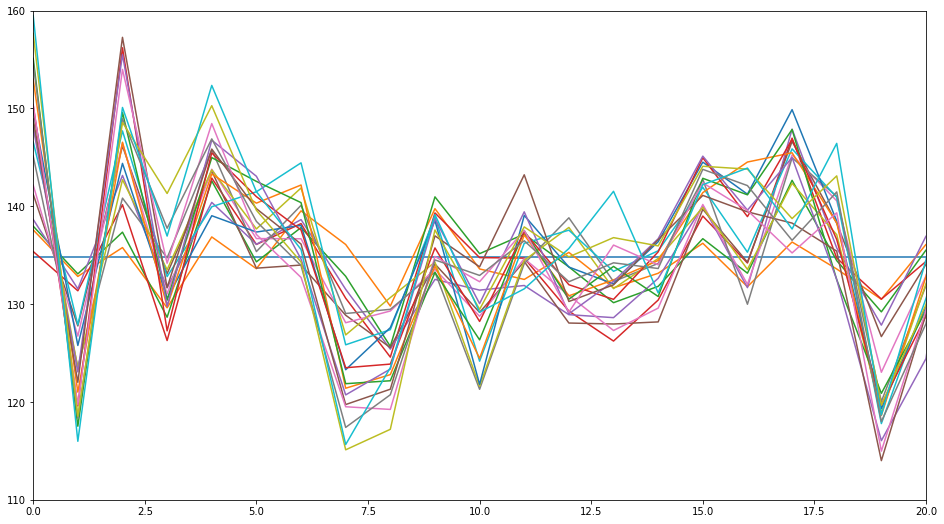

In [45]:
plt.figure(figsize = (16,9))
plt.xlim(0,20)
plt.ylim(110, 160)
for i in price_paths:
    plt.plot(i)